https://www.youtube.com/watch?v=8FCDpFhd1zk

In [43]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import datetime

In [44]:
def str_to_datetime(s):
    split_temp = s.split(' ')
    date = split_temp[0].split('/')
    time = []
    time.append(split_temp[1][0:2])
    time.append(split_temp[1][3:5])
    time.append(split_temp[1][6:8])
    year, month, day = int('20' + date[0]), int(date[1]), int(date[2])
    hour, minutes, seconds = int(time[0]), int(time[1]), int(time[2])
    return datetime.datetime(year=year, month=month, day=day, hour=hour,minute=minutes,second=seconds)

In [45]:
df = pd.read_csv('ticket data.csv',index_col=0)
df['Date'] = df['Date'].apply(str_to_datetime)
df.index = df.pop('Date')
df.head()

,Count
Date,
2022-07-01 00:00:00,362
2022-07-01 01:00:00,486
2022-07-01 02:00:00,363
2022-07-01 03:00:00,225
2022-07-01 04:00:00,116


In [46]:
df.index

DatetimeIndex(['2022-07-01 00:00:00', '2022-07-01 01:00:00',
               '2022-07-01 02:00:00', '2022-07-01 03:00:00',
               '2022-07-01 04:00:00', '2022-07-01 05:00:00',
               '2022-07-01 06:00:00', '2022-07-01 07:00:00',
               '2022-07-01 08:00:00', '2022-07-01 09:00:00',
               ...
               '2022-07-27 09:00:00', '2022-07-27 10:00:00',
               '2022-07-27 11:00:00', '2022-07-27 12:00:00',
               '2022-07-27 18:00:00', '2022-07-27 22:00:00',
               '2022-07-30 00:00:00', '2022-07-30 03:00:00',
               '2022-07-30 18:00:00', '2022-07-30 21:00:00'],
              dtype='datetime64[ns]', name='Date', length=637, freq=None)

In [47]:
df.head()

,Count
Date,
2022-07-01 00:00:00,362
2022-07-01 01:00:00,486
2022-07-01 02:00:00,363
2022-07-01 03:00:00,225
2022-07-01 04:00:00,116


<AxesSubplot:xlabel='Date'>

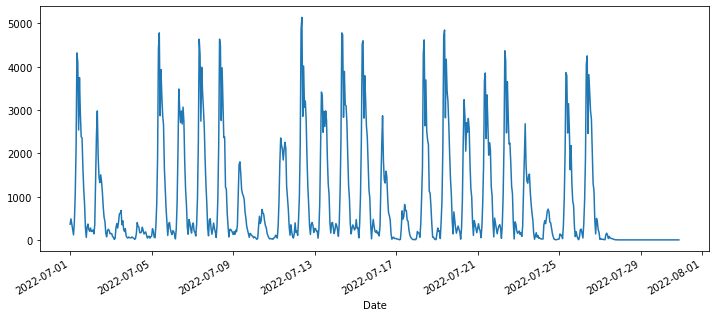

In [48]:
df['Count'].plot(figsize=(12,5))

In [49]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Count'])

1. ADF :  -2.902358958690335
2. P-Value :  0.04507436954451037
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression: 616
5. Critical Values :
	 1% :  -3.4410103235939746
	 5% :  -2.866243374831338
	 10% :  -2.5692748053002195


In [50]:
stepwise_fit = auto_arima(df['Count'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=9858.284, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10869.898, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9910.681, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10259.994, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11193.968, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=9867.807, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=9844.922, Time=0.85 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=9872.374, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=9874.562, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=9855.855, Time=0.61 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=9876.362, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=9871.273, Time=0.35 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 5.078 seconds


In [51]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(637, 1)
(607, 1) (30, 1)


In [52]:
model = sm.tsa.arima.ARIMA(train['Count'],order=(2,0,1))
model=model.fit()
model.summary()

C:\Users\Archit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Archit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Archit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Count   No. Observations:                  607
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -4693.373
Date:                Tue, 04 Oct 2022   AIC                           9396.746
Time:                        08:41:58   BIC                           9418.788
Sample:                             0   HQIC                          9405.322
                                - 607                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1017.1189    157.569      6.455      0.000     708.289    1325.949
ar.L1          1.7705      0.057     31.009      0.000       1.659       1.882
ar.L2         -0.8337      0.052    -15.927      0.000      -0.936      -0.731
ma.L1         -0.7808      0.071    -11.067      0.000      -0.919      -0.642
sigma2      3.035e+05   1.23e+04     24.723      0.000    2.79e+05    3.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.23   Jarque-Bera (JB):              1070.99
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             1.38
Prob(H) (two-sided):                  0.14   Kurtosis:                         8.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Archit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

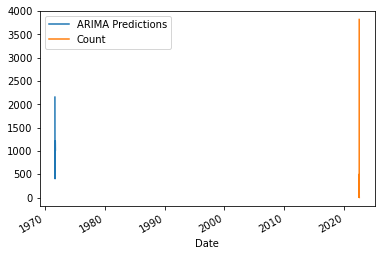

In [53]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Count'].plot(legend=True)

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Count'].mean()
rmse=sqrt(mean_squared_error(pred,test['Count']))
print(rmse)

1008.5492745862296
